In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

In [9]:
from pathlib import Path
l=Path("With_Stremlit.py") 
l

PosixPath('.')

In [1009]:
df = pd.read_csv("spam_2.csv", encoding="latin-1")
df



,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


## 1. Data cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model building
# 5. Evaluation
# 6. Improvement
# 7. Website
# 8. Deploy


## 1.Cleaning


In [1010]:
# drop last 3 cols
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [1011]:
# renaming the cols
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [1012]:
from sklearn.preprocessing import LabelEncoder

In [1013]:
le=LabelEncoder()
df["target"]=le.fit_transform(df["target"])
df
#Ham for 0 and Spam for 1

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [1014]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [1015]:
df["text"].duplicated().sum()

403

In [1016]:
df.drop_duplicates(keep="first",inplace=True)

df

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [1017]:
df["target"].value_counts().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of target
0    4516
1     653
Name: count, dtype: int64>

## 2 EDA

([<matplotlib.patches.Wedge at 0x2c52996d0>,
 [Text(-1.0144997251399075, 0.4251944351600247, 'Ham'),
  Text(1.014499764949479, -0.4251943401757036, 'Spam')],
 [Text(-0.5533634864399495, 0.23192423736001344, '87.366998'),
  Text(0.5533635081542612, -0.23192418555038377, '12.633005')])

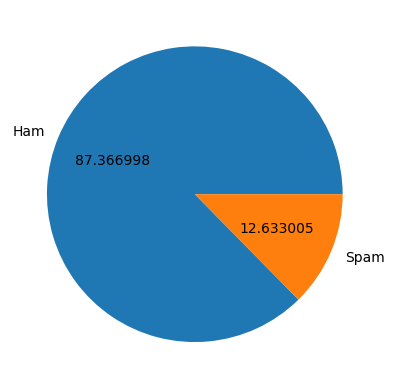

In [1018]:
plt.pie(df["target"].value_counts(),labels=["Ham","Spam"],autopct="%f")

([<matplotlib.patches.Wedge at 0x2fa771350>,
 [Text(-1.0144997251399075, 0.4251944351600247, 'Ham'),
  Text(1.014499764949479, -0.4251943401757036, 'Spam')],
 [Text(-0.5533634864399495, 0.23192423736001344, '87.367'),
  Text(0.5533635081542612, -0.23192418555038377, '12.633')])

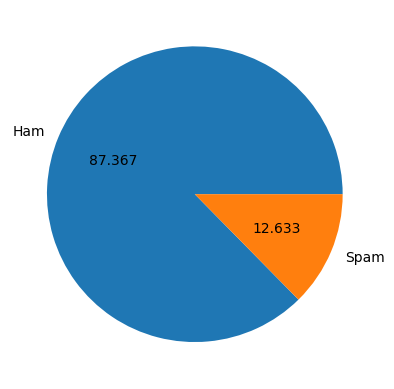

In [1019]:
plt.pie(df["target"].value_counts(),labels=["Ham","Spam"],autopct="%0.3f")

## WE USED NLTK for Text Command analysys


In [1020]:
import nltk

In [1021]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/jaychotaliya/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [1022]:
df["Num_Charachter"]=df["text"].apply(len)
df

,target,text,Num_Charachter
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161
5568,0,Will Ì_ b going to esplanade fr home?,37
5569,0,"Pity, * was in mood for that. So...any other s...",57
5570,0,The guy did some bitching but I acted like i'd...,125


In [1023]:
#Finding the Num of words

df["With NLTK"]=df["text"].apply(lambda x:nltk.word_tokenize(x)).apply(len)


df["With Split"]=df["text"].str.split(" ").apply(len)

In [1024]:
#Okay so we can see that our NLTK give More Accurate Result in Compare to Normal Split 
df

,target,text,Num_Charachter,With NLTK,With Split
0,0,"Go until jurong point, crazy.. Available only ...",111,24,20
1,0,Ok lar... Joking wif u oni...,29,8,6
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,28
3,0,U dun say so early hor... U c already then say...,49,13,11
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,13
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,30
5568,0,Will Ì_ b going to esplanade fr home?,37,9,8
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,10
5570,0,The guy did some bitching but I acted like i'd...,125,27,26


In [1025]:
df.drop(["With NLTK","With Split"],axis=1,inplace=True)
df["Num of words"]=df["text"].apply(lambda x:nltk.word_tokenize(x)).apply(len)

In [1026]:
df["Num of Sentence"]=df["text"].apply(lambda x:nltk.sent_tokenize(x)).apply(len)
df

,target,text,Num_Charachter,Num of words,Num of Sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [1027]:
df[['Num_Charachter','Num of words','Num of Sentence']].describe()

,Num_Charachter,Num of words,Num of Sentence
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [1028]:
# ham
df[df['target'] == 0][['Num_Charachter','Num of words','Num of Sentence']].describe()

,Num_Charachter,Num of words,Num of Sentence
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [1029]:
#spam
df[df['target'] == 1][['Num_Charachter','Num of words','Num of Sentence']].describe()

,Num_Charachter,Num of words,Num of Sentence
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='Num_Charachter', ylabel='Count'>

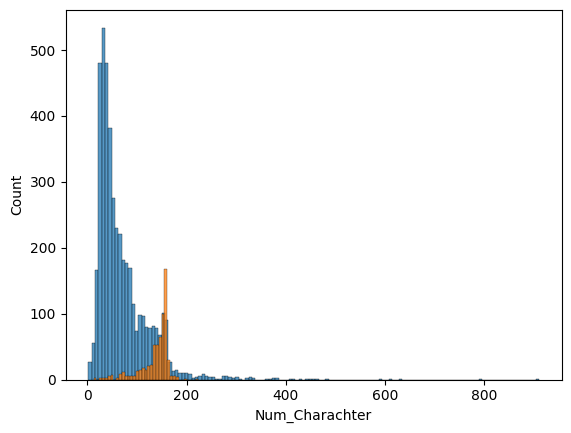

In [1030]:
sns.histplot(df[df["target"]==0]["Num_Charachter"])
sns.histplot(df[df["target"]==1]["Num_Charachter"])

<Axes: xlabel='Num of Sentence', ylabel='Count'>

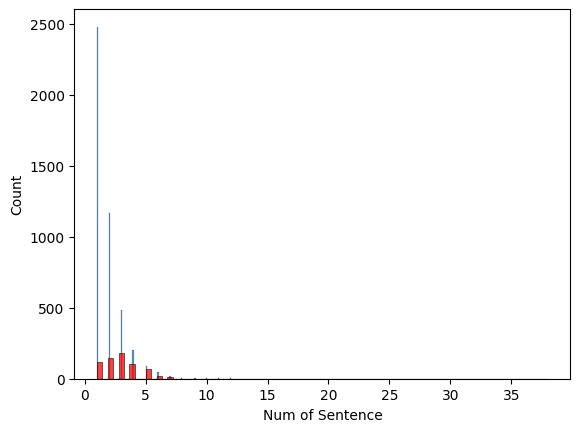

In [1031]:
sns.histplot(df[df["target"]==0]["Num of Sentence"])
sns.histplot(df[df["target"]==1]["Num of Sentence"],color="red")

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


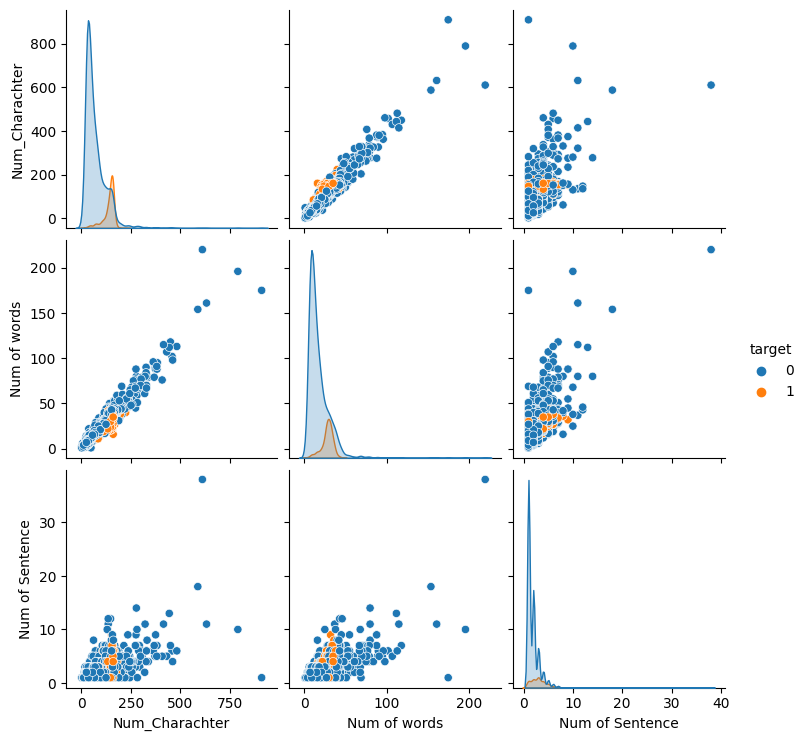

In [1032]:
sns.pairplot(df,hue="target")

In [1033]:
cd=df.select_dtypes(include=[int,float]).corr()
cd["target"]

target             1.000000
Num_Charachter     0.384717
Num of words       0.262912
Num of Sentence    0.263939
Name: target, dtype: float64

<Axes: >

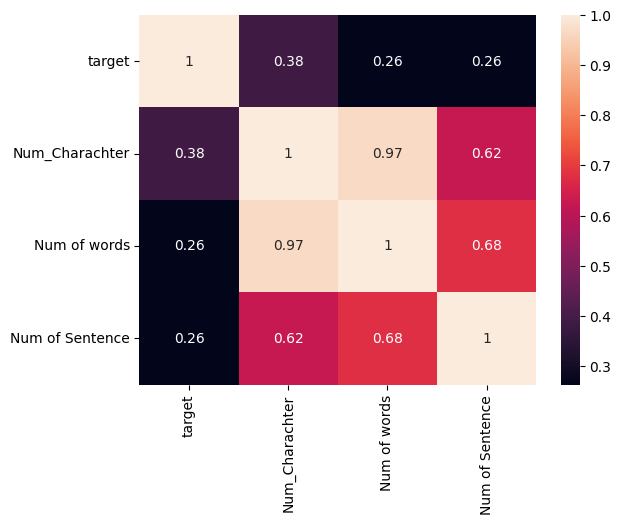

In [1034]:
sns.heatmap(df.select_dtypes(include=[int,float]).corr(),annot=True)

## 3. Data Preprocessing
- Lower case
- Tokenization
- Removing special characters
- Removing stop words and punctuation
- Stemming

In [1035]:
from nltk.stem.porter  import PorterStemmer

ps=PorterStemmer() # This Function is used to convert Tenses into simple if Ing or E or etc is Connect with string so it will remove it and convert in Simple tense
ps.stem("dancing")

'danc'

In [1036]:
from nltk.corpus import stopwords
import string

stopwords.words("english")

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [1037]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [1038]:
def transform_test(text):
    text=text.lower()
    text=nltk.word_tokenize(text) # In  This line Text converted in List After 
    y=[]
    for i in text:
        if i.isalnum(): # This Function Remove Special character like %$#@!
            y.append(i)
    text=y[:] # In This Line We Transform our List in Text variable
    y.clear()# in this line we CLear Our Y variable
    
    for i in text :
        if i not in string.punctuation and i not in stopwords.words("english"):
            y.append(i)
    
    text=y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
        
        
    
    return " ".join(y)
    
    

In [1039]:
transform_test("I did Like to share Something With you ?")

'like share someth'

In [1040]:
transform_test("Heling Peling chilling dancing running") # This All doned by PS

'hele pele chill danc run'

In [1041]:
transform_test(str(df["text"][0]))

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [1042]:
df["text"][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [1043]:
# If we need to apple Function to every raw so we use Apply function like

df["Transformed Text"]=df["text"].apply(transform_test)

In [1044]:
df

,target,text,Num_Charachter,Num of words,Num of Sentence,Transformed Text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4,2nd time tri 2 contact u pound prize 2 claim e...
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like interest buy someth els nex...


In [1045]:
df["Num of words Transformed"]=df["Transformed Text"].apply(lambda x:nltk.word_tokenize(x)).apply(len)

In [1046]:
df

,target,text,Num_Charachter,Num of words,Num of Sentence,Transformed Text,Num of words Transformed
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...,16
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni,6
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...,24
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say,9
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though,7
...,...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4,2nd time tri 2 contact u pound prize 2 claim e...,17
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1,b go esplanad fr home,5
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood suggest,3
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like interest buy someth els nex...,13


In [1047]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [1048]:
spam_wc=wc.generate(df[df["target"]==1]["Transformed Text"].str.cat(sep=" "))

In [1049]:
ham_wc=wc.generate(df[df["target"]==0]["Transformed Text"].str.cat(sep=" "))

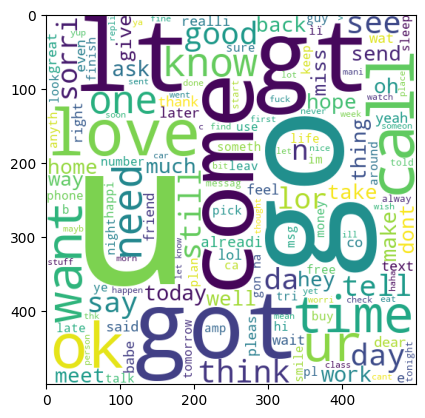

In [1050]:
plt.imshow(spam_wc)

## This Upper Plot is For Spam Messages


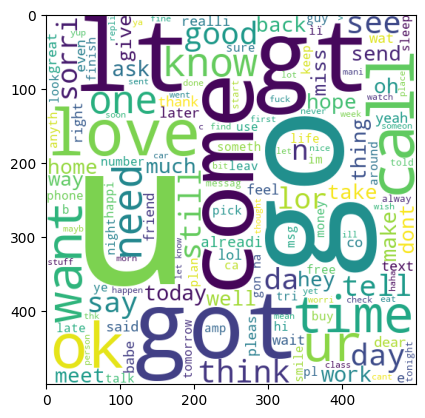

In [1051]:
plt.imshow(ham_wc)

## This Upper Plot is For Ham messages

In [1052]:
spam_corpus = []
for msg in df[df['target'] == 1]['Transformed Text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

    

In [1053]:
from collections import Counter
Counter(spam_corpus)

Counter({'call': 320,
         'free': 191,
         '2': 155,
         'txt': 141,
         'text': 122,
         'u': 119,
         'ur': 119,
         'mobil': 114,
         'stop': 104,
         'repli': 103,
         'claim': 98,
         '4': 97,
         'prize': 82,
         'get': 74,
         'new': 64,
         'servic': 64,
         'tone': 63,
         'send': 60,
         'urgent': 57,
         'nokia': 57,
         'contact': 56,
         'award': 55,
         'phone': 52,
         'cash': 51,
         'pleas': 51,
         'week': 49,
         'win': 48,
         'c': 45,
         'collect': 45,
         'min': 45,
         'custom': 42,
         'messag': 42,
         'guarante': 42,
         'per': 41,
         'chat': 38,
         'tri': 37,
         'msg': 35,
         'draw': 35,
         'number': 35,
         'cs': 35,
         'show': 33,
         'today': 33,
         'offer': 33,
         'line': 33,
         'go': 32,
         'receiv': 31,
         'want': 3

In [1054]:
Ham_Counter = []
for msg in df[df['target'] == 0]['Transformed Text'].tolist():
    for word in msg.split():
        Ham_Counter.append(word)

    

In [1055]:
Counter(Ham_Counter)

Counter({'u': 883,
         'go': 404,
         'get': 349,
         'gt': 288,
         'lt': 287,
         '2': 284,
         'come': 275,
         'got': 236,
         'know': 236,
         'like': 234,
         'call': 233,
         'time': 219,
         'ok': 217,
         'love': 216,
         'good': 213,
         'want': 208,
         'ur': 197,
         'day': 190,
         'need': 170,
         'one': 165,
         'lor': 159,
         '4': 156,
         'home': 152,
         'think': 149,
         'see': 147,
         'take': 143,
         'still': 143,
         'da': 142,
         'tell': 133,
         'make': 129,
         'say': 127,
         'back': 127,
         'today': 123,
         'hope': 122,
         'ask': 121,
         'sorri': 121,
         'n': 120,
         'send': 120,
         'r': 120,
         'work': 118,
         'dont': 118,
         'meet': 112,
         'hi': 111,
         'well': 109,
         'thing': 109,
         'wat': 108,
         'k': 107,
  

## <h0>Model Building</h0>


In [1056]:
from sklearn.feature_extraction.text import CountVectorizer , TfidfVectorizer

In [1057]:
cv=CountVectorizer()
tfidf=TfidfVectorizer(max_features=3000)

## This Upper Two Function CV and TFIDF are used to convert word to Numpy array Soo We Use One By one Two function and check Which give More accurate Result

In [1058]:
X=tfidf.fit_transform(df["Transformed Text"]).toarray()
X.shape

(5169, 3000)

<Axes: >

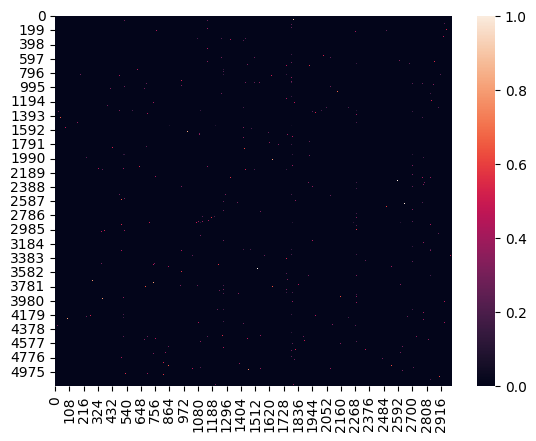

In [1079]:
sns

In [1059]:
y=df["target"].values # Values is Used to Converrt dataframe to array because We have X in Array so we want to use y as Array
y

array([0, 0, 1, ..., 0, 0, 0])

In [1060]:
from sklearn.model_selection import  train_test_split

In [1061]:
X_Train,X_Test,Y_Train,Y_Test=train_test_split(X,y,random_state=42,test_size=0.2)

In [1062]:

from sklearn.naive_bayes import GaussianNB, MultinomialNB , BernoulliNB 
from sklearn.metrics import confusion_matrix , accuracy_score , precision_score , recall_score

In [1063]:
GNB=GaussianNB()
MNB=MultinomialNB()
BNB=BernoulliNB()

In [1064]:
def Finding_model_perameters(model):
    model.fit(X_Train,Y_Train)
    predicted=model.predict(X_Test)
    
    print("This Model Name is ",model)
    print(confusion_matrix(Y_Test,predicted))
    sns.heatmap(confusion_matrix(Y_Test,predicted,normalize="all"),annot=True)
    plt.show()
    print("This is Accuracy",accuracy_score(Y_Test,predicted))
    print("This is PRecision",precision_score(Y_Test,predicted))
    print("This is Recall",recall_score(Y_Test,predicted))
    print("-------------------------------------")
    
    
    

In [1065]:
[GNB,MNB,BNB]
CLCCC={"GNB":GNB,
    "MNb":MNB,
    "BNB":BNB}

This Model Name is  GaussianNB()
[[769 120]
 [ 24 121]]


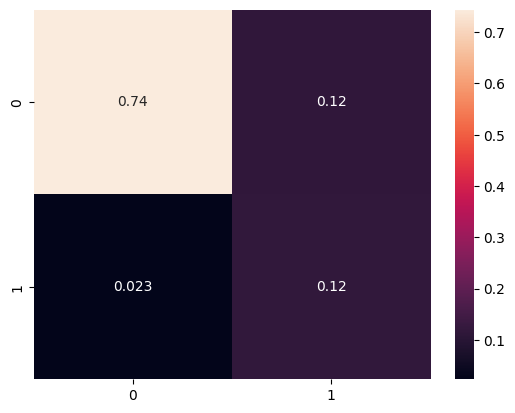

This is Accuracy 0.8607350096711799
This is PRecision 0.5020746887966805
This is Recall 0.8344827586206897
-------------------------------------
This Model Name is  MultinomialNB()
[[888   1]
 [ 27 118]]


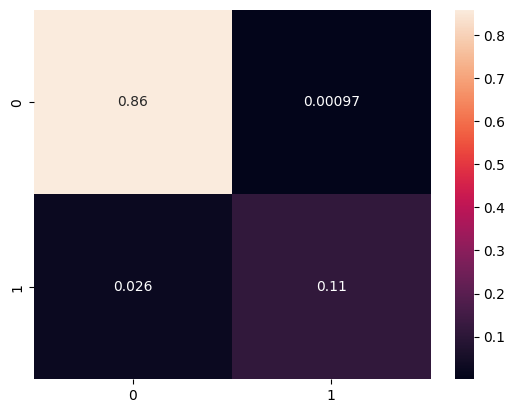

This is Accuracy 0.9729206963249516
This is PRecision 0.9915966386554622
This is Recall 0.8137931034482758
-------------------------------------
This Model Name is  BernoulliNB()
[[884   5]
 [ 23 122]]


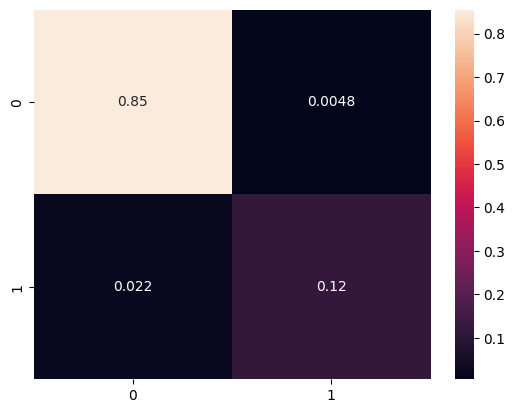

This is Accuracy 0.9729206963249516
This is PRecision 0.9606299212598425
This is Recall 0.8413793103448276
-------------------------------------


In [1066]:
for i in [GNB,MNB,BNB]:
    Finding_model_perameters(i)

In [1067]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier


svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [1068]:
clfs = {
    'SVC' : svc,
    'KN' : knc ,
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb,
    "GNB":GNB,
    "MNb":MNB,
    "BNB":BNB
}


In [1069]:
moduuu=[]
accuu=[]
precuu=[]
def Finding_model_Accuracy_precision(model):
    model.fit(X_Train,Y_Train)
    predicted=model.predict(X_Test)

    moduuu.append(model)

    accuu.append(accuracy_score(Y_Test,predicted))

    precuu.append(precision_score(Y_Test,predicted))



for i in clfs.values():
    Finding_model_Accuracy_precision(i)

In [1094]:
pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuu,'Precision':precuu}).sort_values('Accuracy',ascending=False)


,Algorithm,Accuracy,Precision
8,ETC,0.977756,0.984127
0,SVC,0.976789,0.954887
2,NB,0.972921,0.991597
12,MNb,0.972921,0.991597
13,BNB,0.972921,0.960630
5,RF,0.971954,0.975410
10,xgb,0.966151,0.916667
7,BgC,0.962282,0.884058
6,AdaBoost,0.950677,0.867188
4,LR,0.946809,0.868852


In [1074]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

voting.fit(X_Train,Y_Train)
y_pred = voting.predict(X_Test)
print("Accuracy",accuracy_score(Y_Test,y_pred))
print("Precision",precision_score(Y_Test,y_pred))

Accuracy 0.9816247582205029
Precision 0.9921875


In [1075]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()
from sklearn.ensemble import StackingClassifier
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [1081]:

clf.fit(X_Train,Y_Train)
y_pred = clf.predict(X_Test)
print(X_Test)
print("Accuracy",accuracy_score(Y_Test,y_pred))
print("Precision",precision_score(Y_Test,y_pred))

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Accuracy 0.9816247582205029
Precision 0.95


In [1096]:
def most_frequent(List):
    occurence_count = Counter(List)
    if occurence_count.most_common(1)[0][0] == 0:
        print("Ham")
    else:
        print("Spam")

In [1097]:
y_pred

array([0, 0, 0, ..., 1, 0, 0])

In [1098]:
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

etc.fit(X_Train,Y_Train)
y_pred = etc.predict(X_Test)
print("Accuracy",accuracy_score(Y_Test,y_pred))
print("Precision",precision_score(Y_Test,y_pred))

Accuracy 0.9777562862669246
Precision 0.9841269841269841


In [1099]:


import joblib

joblib.dump(tfidf,"VectorizeinForm")
joblib.dump(voting,"VotingModel")
joblib.dump(clf,"StackingModel")
joblib.dump(etc,"ExtraTreesClassifier_Model")


['ExtraTreesClassifier_Model']